# MLADS 2019 - Deep Learning for NLP Applications: Part 3

# 1-D CNN's for Text Classification

## 1. Anatomy of a Neural Network

#### Training a neural network revolves around the following objects:

- Layer, which are combined into a network or model
- Input data, and the corresponding targets
- Loss function, which defines the feedback signal
- Optimizer, which determines how the learning proceeds
 
    

### Relationship between network, layers, loss function and optimizer

![title](figures/NN_Anatomy_color.png)

## Layers: The building blocks of deep learning

- Layer is a data processing module that takes as input one or more tensors and outputs one or more tensors
- More frequently, layers have a state: layer's weights (learned via the optimizer)
- Types of Layers - Embedding, Densely connected, Dropout, convolutional, Pooling, Recurrent
- Layers are almost like LEGO bricks of deep learning, that is made explicit by Keras
- Layer compatibility refers to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape

#### Building deep learing models in Keras is done by joining together compatible layers to form useful data-transformation pipelines



#### Sequential model is a linear stack of layers

- You can create a Sequential model by passing a list of layer instances to the constructor:

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Define the model architecture in terms of layers
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

#print out the summary of the model
model.summary()

Using TensorFlow backend.
W1118 16:09:17.434148 19176 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1118 16:09:17.547518 19176 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1118 16:09:17.570958 19176 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


- You can also simply add layers via the .add() method:

In [2]:
# Define the model architecture in terms of layers
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

#Print out the summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## 2. ImDB Movie Reviews Classification with Convolutional Neural Networks

### Import needed packages

In [6]:
# For preprocessing text
from keras.preprocessing import sequence

# import sequential model
from keras.models import Sequential

#import needed layers
from keras.layers import Dense, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

# import dataset
from keras.datasets import imdb

### Setting up parameters for reading the textual data

In [7]:
'''
max_features: Number of words to consider as features (Vocabulary)

maxlen: Cuts off text after this number of words 

'''

# set parameters:
max_features = 10000
maxlen = 400


### Loading and preparing the data

In [8]:
'''
Load the data as a list of integers
'''

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


### Remarks

- The argument max_features = 5,000 means you will only keep the top 5,000 most frequently used words in the training data, and rare words will be discarded. 

- The argument maxlen = 400 means we will only keep the first 400 words in the review and postpad (or prepad) if the review is shorter than 400 words

- x_train and x_test are lists of reviews; each review is a list of word indices (encoding a sequence of words)

- y_train and y_test are lists of 0's and 1's (0: negative and 1: positive)

### Example to illustrate the preprocessing steps

![title](figures/preprocess_text.png)

In [6]:
# printing out one particular training example

x_train[10]

array([   7,    4,  118,  785,  189,  108,  126,   93,    2,   16,  540,
        324,   23,    6,  364,  352,   21,   14,    9,   93,   56,   18,
         11,  230,   53,  771,   74,   31,   34,    4, 2834,    7,    4,
         22,    5,   14,   11,  471,    9,    2,   34,    4,  321,  487,
          5,  116,   15, 6584,    4,   22,    9,    6, 2286,    4,  114,
       2679,   23,  107,  293, 1008, 1172,    5,  328, 1236,    4, 1375,
        109,    9,    6,  132,  773,    2, 1412,    8, 1172,   18, 7865,
         29,    9,  276,   11,    6, 2768,   19,  289,  409,    4, 5341,
       2140,    2,  648, 1430,    2, 8914,    5,   27, 3000, 1432, 7130,
        103,    6,  346,  137,   11,    4, 2768,  295,   36, 7740,  725,
          6, 3208,  273,   11,    4, 1513,   15, 1367,   35,  154,    2,
        103,    2,  173,    7,   12,   36,  515, 3547,   94, 2547, 1722,
          5, 3547,   36,  203,   30,  502,    8,  361,   12,    8,  989,
        143,    4, 1172, 3404,   10,   10,  328, 12

Here is how you can decode it back to get the words

In [7]:
word_index = imdb.get_word_index()
print(type(word_index))

count = 0
for key, val in word_index.items():
    print(key, "==>", val)
    count = count + 1
    if (count > 5):
        break

<class 'dict'>
onset ==> 15628
cassie ==> 8872
tkotsw ==> 63333
oakhurst ==> 42115
dailey ==> 34722
collusion ==> 40661


In [8]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[0]])
print(decoded_review)

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it m

###  Training and evaluating a simple 1D convnet on the IMDB data

Keras offers an __Embedding layer__ that can be used for neural networks on text data.

It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:

- It can be used alone to learn a word embedding that can be saved and used in another model later.
- It can be used as part of a deep learning model where the embedding is learned along with the model itself.
- It can be used to load a pre-trained word embedding model, a type of transfer learning.

In [11]:
'''
Defining the params of the CNN

embedding dims: Dimensionality of the vector representing each word

filters: Number of convolution filters used

kernel_size: length of the 1-D conv filter

epochs: Number of cyclings through the train set

batch_size: Weight vector Updates are made after cycling through these many examples
'''

embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2
batch_size = 32


### Illustration of the network architecture we will be using

![title](figures/network_architecture.png)

In [12]:
print('Specify model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))


# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))

model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()



Specify model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           500000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
_________________________________________________________________
activation_4 (Activation)    (None, 1

### Remarks

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

- __input_dim__: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
- __output_dim__: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
- __input_length__: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

### Illustration of the embedding layer

![title](figures/embedding_layer.png)

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

W1118 16:32:36.370974 19176 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 111s 4ms/step - loss: 0.3762 - acc: 0.8196 - val_loss: 0.3240 - val_acc: 0.8620
Epoch 2/6
25000/25000 [==============================] - 114s 5ms/step - loss: 0.1775 - acc: 0.9326 - val_loss: 0.2661 - val_acc: 0.8916
Epoch 3/6
25000/25000 [==============================] - 120s 5ms/step - loss: 0.0694 - acc: 0.9776 - val_loss: 0.3472 - val_acc: 0.8826
Epoch 4/6
25000/25000 [==============================] - 111s 4ms/step - loss: 0.0269 - acc: 0.9915 - val_loss: 0.4714 - val_acc: 0.8756
Epoch 5/6
25000/25000 [==============================] - 106s 4ms/step - loss: 0.0135 - acc: 0.9954 - val_loss: 0.5650 - val_acc: 0.8759
Epoch 6/6
25000/25000 [==============================] - 92s 4ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 0.6390 - val_acc: 0.8801


### Plotting training and validation accuracy

- The call to model.fit() returns a history object
- This has a member "history", which is a dictionary containing everything that happened during training

In [12]:
history_dict = history.history
history_dict.keys()
print(history_dict['acc'])

[0.81728000000000001, 0.93640000000000001, 0.97819999999999996, 0.99424000000000001, 0.99872000000000005, 0.99531999999999998]


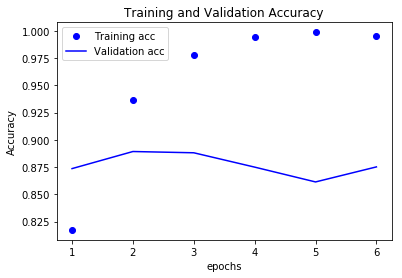

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Evaluating results on the test set

In [14]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 79us/step


In [15]:
results

[0.63385873230099676, 0.87512000000000001]